# Research for Megaline to know which plan make more revenue

The telecom Megaline company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
We have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 
We are going to analyze clients' behavior and determine which prepaid plan brings in more revenue.
our goals that we want to acheive
- read the 5 data sets
- deal with missing value
- change data types
- looking for duplicates
- analyze the merging data with hisograms 
- calculate the revenue
- conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np 
from scipy import stats 
from scipy.stats import mannwhitneyu
calls=pd.read_csv('/datasets/megaline_calls.csv')
web=pd.read_csv('/datasets/megaline_internet.csv')
text_msg=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
user=pd.read_csv('/datasets/megaline_users.csv')
calls.info()
web.info()
text_msg.info()
plans.info()
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (tot

we have 5 data frame 
- **User**
- **Plan**
- **Text**
- **Call**
- **MegaBytes**

# Data Preprocessing

In this chapter we are going to study the missing values for each dataFrame

User

In [2]:
user.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

we hace 466 missed value in the churn date column which is the column that the user stopped using the service i am going to replace the missing value by 0000-00-00 maybe the user is still using the plan

In [3]:
user['churn_date'].value_counts()

2018-12-18    3
2018-12-19    2
2018-11-14    2
2018-12-31    2
2018-09-07    1
2018-12-27    1
2018-11-16    1
2018-08-19    1
2018-12-10    1
2018-11-29    1
2018-12-22    1
2018-09-18    1
2018-12-30    1
2018-08-16    1
2018-11-11    1
2018-11-24    1
2018-12-26    1
2018-12-15    1
2018-10-07    1
2018-10-22    1
2018-10-13    1
2018-10-03    1
2018-11-18    1
2018-11-30    1
2018-11-21    1
2018-12-12    1
2018-09-17    1
2018-07-31    1
2018-09-01    1
Name: churn_date, dtype: int64

In [4]:
user['churn_date'].fillna('0000-00-00',inplace=True)
user['churn_date']

0      0000-00-00
1      0000-00-00
2      0000-00-00
3      0000-00-00
4      0000-00-00
          ...    
495    0000-00-00
496    0000-00-00
497    0000-00-00
498    0000-00-00
499    0000-00-00
Name: churn_date, Length: 500, dtype: object

Plan

In [5]:
plans.isnull()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False


we don't have any missing value in the plan dataframe

Web

In [6]:
web.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

we don't have any missing value in the plan dataframe

Text

In [7]:
text_msg.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [8]:
user.isnull().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

we don't have any missing value in the text dataframe

Call

In [9]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

we don't have any missing value in the call dataframe

# Changing data types

Changing the dates in each dataset from object to dateTime64 type

In [10]:
print(web)

web['session_date']=pd.to_datetime(web['session_date'])
#web['month']=pd.DatetimeIndex(web['session_date']).month
web.info()

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [11]:
text_msg['message_date']=pd.to_datetime(text_msg['message_date'])


In [12]:
user['reg_date']=pd.to_datetime(user['reg_date'])
#user['churn_date']=pd.to_datetime(user['churn_date'])
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


# looking for duplicates in user data sets

In [13]:
user.duplicated().sum()

0

# Adding columns

# Call

In [14]:
print(calls.describe())
calls['duration_round']=np.ceil(calls['duration'])

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


we have **min value** duration for a call which is**zero** maybe it's a missed call 

**max value** 38 minutes 

**the average** for the users spent on calls 7 minutes 

**25%** 2 minutes 

**50%** 6 minutes

**75%** 11 minutes 

**std** equals to 6 and that's mean that the distribuation of the data are closed to the mean 

In [15]:
s=calls.query('duration_round == 0')['duration_round'].count()
rate=(s/len(calls))*100
print('The propotional for the zero calls{:.2f}'.format(rate))
if rate > 10:
    print('we cannot delete the rows because{:.2f}'.format(rate),'its a siginificant data neither consider them as an ouliers')
else:
    print('we are going to delete the data ')

The propotional for the zero calls19.48
we cannot delete the rows because19.48 its a siginificant data neither consider them as an ouliers


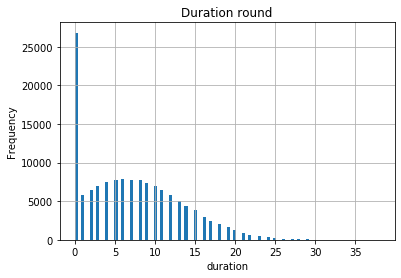

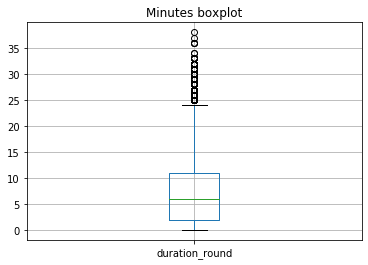

lower outlier -11.5 upper outliers 24.5


In [16]:
calls['duration_round'].hist(bins=100)
plt.title('Duration round')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()
q1 = calls['duration_round'].quantile(0.25)
q3 = calls['duration_round'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
calls.boxplot('duration_round')
plt.title('Minutes boxplot')
plt.show()
print('lower outlier',lo ,'upper outliers', uo)

In [17]:
#print(calls)
calls['month']=pd.DatetimeIndex(calls['call_date']).month
#number_of_calls_each_month=calls.groupby(['user_id','m'])['id'].count()
#number_of_minutes_each_month = calls.groupby(['user_id','m'])['duration'].sum()
#print(number_of_minutes_each_month)
#print(number_of_calls_each_month)
#'calls_each_month','minutes_each_month'
call = calls.pivot_table(index=['user_id','month'],values=['id','duration_round'],aggfunc={'count','sum'})
call.columns=['1','minutes_each_month','calls_each_month','4']
call.drop(['1','4'],axis='columns',inplace=True)


adding the call month for each user then grouped the data by the user_id and month calculating the number of calls for each user  per month and the minutes_each_month column 

missed calls are counted in the number of calls with zero minutes duration for a call

# Text

       msg_each_month
count     1806.000000
mean        42.110188
std         33.122931
min          1.000000
25%         17.000000
50%         34.000000
75%         59.000000
max        266.000000
lower outlier -46.0 upper outliers 122.0


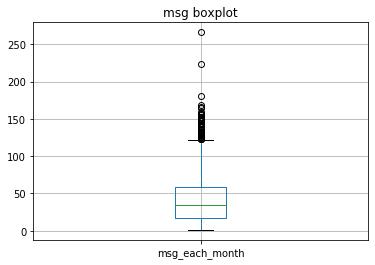

In [18]:
#print(text_msg)
text_msg['month']=pd.DatetimeIndex(text_msg['message_date']).month
#number_of_msgs_each_month=text_msg.groupby(['user_id','month'])['id'].count()
#print(number_of_msgs_each_month)
txt = text_msg.pivot_table(index=['user_id','month'] ,values=['id'],aggfunc={'count'})
txt.columns=['msg_each_month']
print(txt.describe())
q1 = txt['msg_each_month'].quantile(0.25)
q3 = txt['msg_each_month'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
print('lower outlier',lo ,'upper outliers', uo)
txt.boxplot('msg_each_month')
plt.title('msg boxplot')
plt.show()

we have **min value** for text msg each month equals to **one**

**max value** 266 msg 

**the average** for the users sending msgs each month 42 minutes 

**25%** 17 msg

**50%** 34 msg

**75%** 59 msg 

**std** equals to 33 and that's mean that the distribuation of the data around the mean 

# Plan

In [19]:
plans_count=user.pivot_table(index='plan',values='user_id',aggfunc='count')
plans_count

,user_id
plan,
surf,339
ultimate,161


There is 339 users subscribe with surf plan while 161 users uses the ultimate one Thats means that the surf users are double of the ultimate ones

# Web

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


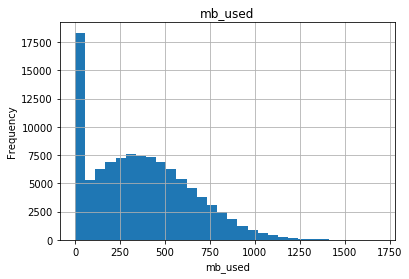

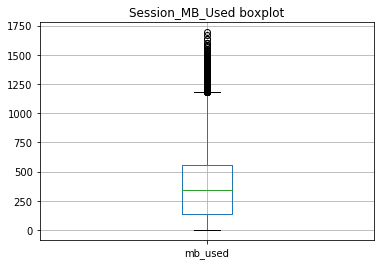

lower outlier -491.71 upper outliers 1182.40
we cannot delete the rows because 13.11423801574052 its a siginificant data so we are going to consider them as an ouliers


In [20]:
print(web.describe())
web['mb_used'].hist(bins=30)
plt.title('mb_used')
plt.xlabel('mb_used')
plt.ylabel('Frequency')
plt.show()
q1 = web['mb_used'].quantile(0.25)
q3 = web['mb_used'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
web.boxplot('mb_used')
plt.title('Session_MB_Used boxplot')
plt.show()
print('lower outlier {:.2f}'.format(lo) ,'upper outliers {:.2f}'.format(uo))
x=web.query('mb_used == 0')['mb_used'].count()
r=(x/len(web))*100
r
if r > 10:
    print('we cannot delete the rows because',r,'its a siginificant data so we are going to consider them as an ouliers')
else:
    print('we are going to delete the data ')


we have **min value** for a session MB equals to **zero** : a session with wrong data ,for a wrong APN or website that didn't use any data

**max value** 1694 MB

**the average** for the MB used per session 366 MB

**25%** 136 MB

**50%** 344 MB

**75%** 555 MB 

**std** equals to 277 and that's mean that the distribuation of the data around the mean 


In [21]:
web['month']=pd.DatetimeIndex(web['session_date']).month
web


volume_month = web.pivot_table(index=['user_id','month'] ,values=['mb_used'],aggfunc={'sum'})
volume_month.columns=['mb_volume per month']
volume_month['mb_volume per month']=np.ceil(volume_month['mb_volume per month'])
volume_month['mb_volume per month']=volume_month['mb_volume per month'].astype(int)

volume_month['gb_volume per month']=volume_month['mb_volume per month']/1024
volume_month['gb_volume per month']=np.ceil(volume_month['gb_volume per month'])
volume_month['gb_volume per month']=volume_month['gb_volume per month'].astype(int)

print(volume_month.describe())

       mb_volume per month  gb_volume per month
count          2277.000000          2277.000000
mean          16882.697409            16.989021
std            7869.776308             7.693683
min              93.000000             1.000000
25%           12348.000000            13.000000
50%           16874.000000            17.000000
75%           21042.000000            21.000000
max           70932.000000            70.000000


i add a month column and grouped the data by user_id and month calculating the total MB used for each user per month and GB column which is the MB converts it to GB by dividing 1024

we have **min value** for total MB used per month equals to **93** 

**max value** 70932 MB

**the average**  MB used per month for each user 16882 MB

**25%** 12348 MB

**50%** 16874 MB

**75%** 21042 MB 

**std** equals to 7869

# Conclusion

We preprocess the data cheking it to deal with missing values,duplicates,data types and outliers.

we noticed that there is no missing values except in user churn date data 

No duplicates 

changing data type to the correct type
- integer to int64
- date to datetime64
- float to float64

added up specific columns like

- GB used per month for each user
- rounding up specific columns 

Then in each data set i made pivot_table indexed by user_id and month

# Monthly revenue from each user

In this chapter i am going to merge the five data sets together by user_id and month Thus i can calculate the revenue for each plan per user in each month.

First merging the txt and call dataFrame by user_id and month filling the missing values with 0 for example if a user text message but doesn't mae an call so its going to get nan value i merged it by how='outer'
then merging the new1 with the session data save it to new2 
merging new2 with user  by user_id to get the plan and city for each user

In [22]:
new1 = pd.merge(left=txt,right=call,how='outer',on=['user_id','month']).fillna(0)
new2 = pd.merge(left=new1 , right = volume_month , on =['user_id','month']).fillna(0).reset_index()
#new2['plan'] = user.groupby('user_id')['plan'].transform((lambda row: pp(row), axis=1))
#user['plan_num'] = user['plan']
#user['plan_num'] = user['plan_num'].replace({'surf': 1 ,'ultimate':2})
new3 = pd.merge(left=new2 , right = user[['user_id','plan','city']] ,how='inner', on =['user_id']).fillna(0)

#userr = user.pivot_table(index=['user_id','month'],values='plan_num')
#new3 = pd.merge(left=new2 , right = userr ,how='outer', on =['user_id','month']).fillna(0)
#new3.drop(columns=['first_name','age','last_name','reg_date','churn_date'],inplace=True,axis=0)
new3

,user_id,month,msg_each_month,minutes_each_month,calls_each_month,mb_volume per month,gb_volume per month,plan,city
0,1000,12,11.0,124.0,16.0,1902,2,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,30.0,182.0,27.0,6920,7,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,44.0,315.0,49.0,13315,14,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,53.0,393.0,65.0,22331,22,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,36.0,426.0,64.0,18505,19,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2270,1498,12,0.0,339.0,39.0,23138,23,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2271,1499,9,0.0,346.0,41.0,12985,13,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2272,1499,10,0.0,385.0,53.0,19493,20,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2273,1499,11,0.0,308.0,45.0,16814,17,surf,"Orlando-Kissimmee-Sanford, FL MSA"


defining a function rev_msg to calculate the messages revenue for each user per month according to the plan 
subtracting the number of messages that it allwed for the user to consume it per month according to the plan from the total number of msgs that the user used per month 


For example if the user used 70 msg and the surf plan limit 50 we are going to gain revenue from th 20 messages he used more
- 70 - 50 = 20 
- 20 * how much the message cost 0.03 $ = 0.6 $ we gain from the user on a specific month
on the other hand if the user used 20 msg
- 20 - 50 = - 30 so the remaing was 30 msg for him 
in this case we are going to gain nothing just the plan cost which is 20 $ the user will not pay extra costs





***NOTE: the same strategy is applied to the call and Mb columns***


In [23]:
def rev_msg(data):
    if data['plan'] == 'surf':
        x = data['msg_each_month']-plans['messages_included'][0]
        if x > 0: 
            y = x * plans['usd_per_message'][0]
            return y
        elif x <= 0:
            return x
    elif data['plan'] == 'ultimate':
        x= data['msg_each_month'] - plans['messages_included'][1]
        if x > 0: 
            y = x * plans['usd_per_message'][1]
            return y
        elif x <= 0:
            return x

for row in new3:
    new3['msg_rev']=  new3.apply(rev_msg,axis=1)
    

In [24]:
x = new3[(new3['plan'] == 'surf')&(new3['msg_rev'] > 0)]['msg_rev'].sum()
z = new3[(new3['plan'] == 'ultimate')&(new3['msg_rev'] > 0)]['msg_rev'].sum()
print('the revenue in surf plan for msg =','$',x,'the revenue in ultimate plan for msg =','$',z)

the revenue in surf plan for msg = $ 310.89 the revenue in ultimate plan for msg = $ 0.0


In [25]:
def rev_call(data):
    if data['plan'] == 'surf':
        x = data['minutes_each_month']-plans['minutes_included'][0]
        if x > 0: 
            y = x * plans['usd_per_minute'][0]
            return y
        elif x <= 0:
            return x
    elif data['plan'] == 'ultimate':
        x= data['minutes_each_month'] - plans['minutes_included'][1]
        if x > 0: 
            y = x * plans['usd_per_minute'][0]
            return y
        elif x <= 0:
            return x

for row in new3:
    new3['call_rev']=  new3.apply(rev_call,axis=1)
g = new3[(new3['plan'] == 'surf')&(new3['call_rev'] > 0)]['call_rev'].sum()
h = new3[(new3['plan'] == 'ultimate')&(new3['call_rev'] > 0)]['call_rev'].sum()
print('the revenue in surf plan for calls =','$',g,'the revenue in ultimate plan  calls =','$',h)


the revenue in surf plan for calls = $ 2888.46 the revenue in ultimate plan  calls = $ 0.0


In [26]:
def rev_mg(data):
    if data['plan'] == 'surf':
        x = data['mb_volume per month']-plans['mb_per_month_included'][0]
        if x > 0: 
            y = (x/1000) * plans['usd_per_gb'][0]
            return y
        elif x <= 0:
            return x
    elif data['plan'] == 'ultimate':
        x= data['mb_volume per month'] - plans['mb_per_month_included'][1]
        if x > 0: 
            y = (x/1000) * plans['usd_per_gb'][1]
            return y
        elif x <= 0:
            return x

for row in new3:
    new3['mg_rev']=  new3.apply(rev_mg,axis=1)
d = new3[(new3['plan'] == 'surf')&(new3['mg_rev'] > 0)]['mg_rev'].sum()
f = new3[(new3['plan'] == 'ultimate')&(new3['mg_rev'] > 0)]['mg_rev'].sum()
print('the revenue in surf plan for sessions =','$',d,'the revenue in ultimate plan for sessions =','$',f)


the revenue in surf plan for sessions = $ 57377.33 the revenue in ultimate plan for sessions = $ 1560.3


In [27]:
new3.head(3)

,user_id,month,msg_each_month,minutes_each_month,calls_each_month,mb_volume per month,gb_volume per month,plan,city,msg_rev,call_rev,mg_rev
0,1000,12,11.0,124.0,16.0,1902,2,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",-989.0,-2876.0,-28818.0
1,1001,8,30.0,182.0,27.0,6920,7,surf,"Seattle-Tacoma-Bellevue, WA MSA",-20.0,-318.0,-8440.0
2,1001,9,44.0,315.0,49.0,13315,14,surf,"Seattle-Tacoma-Bellevue, WA MSA",-6.0,-185.0,-2045.0


# total pay for each user

if you are curious to now how much revenue company gaiqned for each plan then let's take a loo on the total_pay column which adds up the revenue plus the plan cost for each user per month
sums up the revenue for call msg and Mb used adds them to the default plan cost 
for example if Tom used surf plan with
- msg revenue = 1.2 
- call revenue =  4.3
- and MB revenue =  0.0


how much is tom going to pay ?

**1.2 + 4.3 + 0.0 + 20 (surf plan) =$ 25.5**


In [28]:
def total(data):
    call = data['call_rev']
    gb =  data['mg_rev']
    msg =  data['msg_rev']
    if data['plan'] == 'surf':
        x = plans['usd_monthly_pay'][0]
        if call > 0:
            x = x + call
        elif gb >0:
            x = x+gb
        elif msg > 0:
            x=x+msg
        return x
    elif data['plan'] == 'ultimate':
        y = plans['usd_monthly_pay'][1]
        if call > 0:
            y = y + call
        elif gb >0:
            y = y+gb
        elif msg > 0:
            y=y+msg
        return y
new3['total_pay']=new3.apply(total,axis=1)


# Describing the Data with Histograms

Above we saw the mean ,std ,and the despersion for each dataset for all plans

**$But$ here we are going to see for each plan for each user per month how are users using them?!!**

# Texts

To compare between two plans the surf and ultimate in the total number of messages the users used per month i grouped the data by month summing the number of messages and counting how many useres sent messages on a specific month and that help us to now which month are people texting more with each other

           month  surf_count_msg  ultimate_count_msg  surf_sum_msg  \
count  12.000000       12.000000           12.000000     12.000000   
mean    6.500000      129.833333           59.750000   3989.583333   
std     3.605551      107.310792           48.932467   3951.608222   
min     1.000000        2.000000            4.000000     21.000000   
25%     3.750000       42.500000           18.750000    735.750000   
50%     6.500000      107.500000           52.500000   2721.500000   
75%     9.250000      203.250000           90.750000   6330.750000   
max    12.000000      317.000000          150.000000  12122.000000   

       ultimate_sum_msg  
count         12.000000  
mean        2252.916667  
std         2167.671623  
min           62.000000  
25%          408.000000  
50%         1658.000000  
75%         3489.000000  
max         6796.000000  


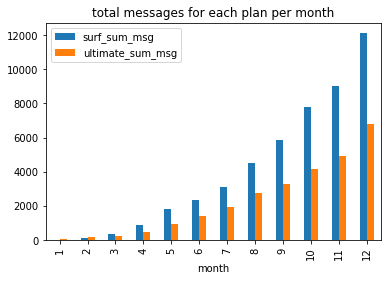

In [29]:
total_msg_per_month=new3.pivot_table(index =['month'],values=['msg_each_month'],columns=['plan'],aggfunc={'count','sum'}).reset_index()
total_msg_per_month.columns=['month','surf_count_msg','ultimate_count_msg','surf_sum_msg','ultimate_sum_msg']
print(total_msg_per_month.describe())
total_msg_per_month.plot(y=['surf_sum_msg','ultimate_sum_msg'],x='month',kind='bar',title='total messages for each plan per month')
plt.show()


**Overall view :**
    
    The total messages for each plan per month bar graph we can see the users subscribe with the surf plan texting much more then ultimate user 
**Sekweness**:

    Both chart skew to the right maybe because users register more in later months of the year not at the begining of the year
    
**Describe**
- **Surf**

   * the max value happened on december and its around 12K msg sent by 317 users
   * at january there is no users sent msgs
   * the avg for msgs sent per month around 4K msg
   * 25 % of users sent 735 msg per month
   * 50% 2721 msg
   * 75% 6430 msg
   * the std 3952 
   
- **Ultimate**

   * the max value happened on december and its around 6800 msg 
   * the min value happened at january there is 62 msgs sent by 4 users
   * the avg for msgs sent per month around 2252 msg
   * 25 % of users sent 408 msg per month
   * 50% 1658 msg
   * 75% 3489 msg
   * the std 2167 


**variance**

In [30]:
variance_surf = np.var(total_msg_per_month['surf_sum_msg'])
variance_ultimate = np.var(total_msg_per_month['ultimate_sum_msg'])
print(' variance is the squared deviation of a variable from its mean')
print('variance for surf = {:.2f}'.format(variance_surf),'variance for ultimate plan ={:.2f}'.format(variance_ultimate))

 variance is the squared deviation of a variable from its mean
variance for surf = 14313940.24 variance for ultimate plan =4307233.58


# Call

To compare between two plans the surf and ultimate in the total number of minutes the users used per month i grouped the data by month summing the number of minutes and counting how many useres spend on a call duration on a specific month and that help us to now At which month are people talking to each other more

           month  surf_count_min  ultimate_count_min   surf_sum_min  \
count  12.000000       12.000000           12.000000      12.000000   
mean    6.500000      129.833333           59.750000   55807.750000   
std     3.605551      107.310792           48.932467   48753.825299   
min     1.000000        2.000000            4.000000     406.000000   
25%     3.750000       42.500000           18.750000   15047.250000   
50%     6.500000      107.500000           52.500000   47590.500000   
75%     9.250000      203.250000           90.750000   85135.500000   
max    12.000000      317.000000          150.000000  150088.000000   

       ultimate_sum_min  
count         12.000000  
mean       25827.000000  
std        22846.433388  
min          774.000000  
25%         6218.250000  
50%        21316.000000  
75%        40164.000000  
max        69324.000000  


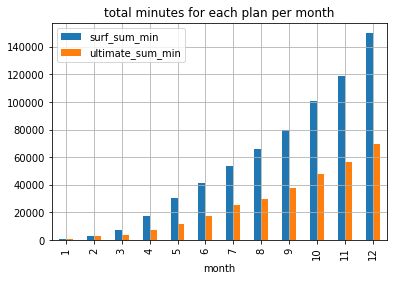

In [31]:
total_min_per_month=new3.pivot_table(index =['month'],values=['minutes_each_month'],columns=['plan'],aggfunc={'count','sum'}).reset_index()
total_min_per_month.columns=['month','surf_count_min','ultimate_count_min','surf_sum_min','ultimate_sum_min']
print(total_min_per_month.describe())
total_min_per_month.plot(y=['surf_sum_min','ultimate_sum_min'],grid=True,x='month',kind='bar',title='total minutes for each plan per month')
plt.show()

**Overall view :**
    
    The total number of minutes for each plan per month by the bar chart we can see the users subscribe with the surf plan calling duration much more then ultimate user like the texting chart
**Sekweness**:

    Both chart skew to the right maybe because users register more in the later months of the year not at the begining of the year
    
**Describe**
- **Surf**

   * the max value happened on december and its around 15K minutes
   * at january there is 406 minutes which is the minimum value by 2 users
   * the avg for calls duration per month around 56K minutes
   * 25 % of users spend on a call 15K minutes per month
   * 50% 47590 minutes 
   * 75% 85136 minutes
   * the std 49K 
   
- **Ultimate**

   * the max value happened on december, its around 69K minutes
   * the min value happened at january 774 minutes
   * the avg for time spent during the calls per month around 26K minutes
   * 25 % of users spend on a call 6K minutes per month
   * 50% 21K msg
   * 75% 40K msg
   * the std 23K


           month  surf_count_mg  ultimate_count_mg   surf_sum_mg  \
count  12.000000      12.000000          12.000000  1.200000e+01   
mean    6.500000     129.833333          59.750000  2.170580e+06   
std     3.605551     107.310792          48.932467  1.922086e+06   
min     1.000000       2.000000           4.000000  9.750000e+03   
25%     3.750000      42.500000          18.750000  5.261640e+05   
50%     6.500000     107.500000          52.500000  1.757584e+06   
75%     9.250000     203.250000          90.750000  3.439850e+06   
max    12.000000     317.000000         150.000000  5.766286e+06   

       ultimate_sum_mg  
count     1.200000e+01  
mean      1.032768e+06  
std       8.846527e+05  
min       2.767400e+04  
25%       3.088908e+05  
50%       8.418895e+05  
75%       1.561334e+06  
max       2.766642e+06  


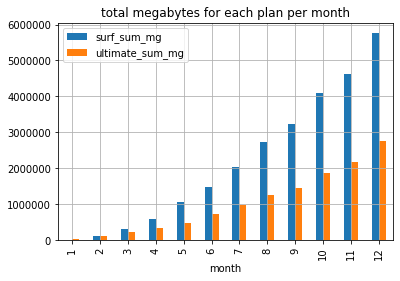

In [32]:
total_mg_per_month=new3.pivot_table(index =['month'],values=['mb_volume per month'],columns=['plan'],aggfunc={'count','sum'}).reset_index()
total_mg_per_month.columns=['month','surf_count_mg','ultimate_count_mg','surf_sum_mg','ultimate_sum_mg']
print(total_mg_per_month.describe())
total_mg_per_month.plot(y=['surf_sum_mg','ultimate_sum_mg'],grid=True,x='month',kind='bar',title='total megabytes for each plan per month')
plt.show()

**Overall view :**
    
    The total number of minutes for each plan per month by the bar chart we can see the users subscribe with the surf plan calling duration much more then ultimate user
**Sekweness**:

    Both chart skew to the right maybe because users register more in the later months of the year not at the begining of the year


**Variance**

In [33]:
variance_surf = np.var(total_mg_per_month['surf_sum_mg'])
variance_ultimate = np.var(total_mg_per_month['ultimate_sum_mg'])
print(' variance is the squared deviation of a variable from its mean')
print('variance for surf = {:.2f}'.format(variance_surf),'variance for ultimate plan ={:.2f}'.format(variance_ultimate))

 variance is the squared deviation of a variable from its mean
variance for surf = 3386546516264.39 variance for ultimate plan =717392810593.02


# Conclusion

we have two plan for each plan i calculate the mean the std and the variance for the total minutes and text in each month

For both Surf and Ultimate
we can see that either the total minutes or total msgs start with a miniumum value and then the values start geting bigger with increasing the month we can see that the peak arrives in december 



# Revenue

how much messages revenue the company are going to gain per month for each plan
grouping the data by month and plan and suming up the messages revenue for each month and count the number of users that we gain from them


    month  plan    sum  count
0       2  surf   0.24      1
1       3  surf   0.39      2
2       4  surf   2.61      3
3       5  surf   9.63     10
4       6  surf  12.00     15
5       7  surf  14.67     22
6       8  surf  26.46     28
7       9  surf  33.69     41
8      10  surf  56.37     59
9      11  surf  56.46     56
10     12  surf  98.37     94
           month        sum      count
count  11.000000  11.000000  11.000000
mean    7.000000  28.262727  30.090909
std     3.316625  30.902235  29.632599
min     2.000000   0.240000   1.000000
25%     4.500000   6.120000   6.500000
50%     7.000000  14.670000  22.000000
75%     9.500000  45.030000  48.500000
max    12.000000  98.370000  94.000000


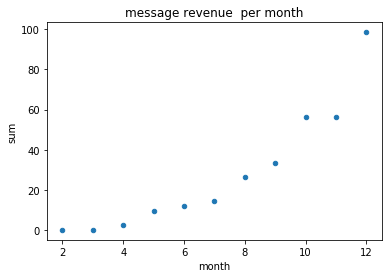

In [34]:

total_rev_msg_per_month=new3.query('msg_rev > 0').groupby(['month','plan'])['msg_rev'].agg({'count','sum'}).reset_index()
print(total_rev_msg_per_month)
total_rev_msg_per_month.plot(x='month',y='sum',kind='scatter',title='message revenue  per month')
print(total_rev_msg_per_month.describe())


we dropped **scatter plot** between the month and the total number of revenue each month 

we can see that there is **no revenue** from ultimate plan just the surf plan

* The maximum gain at december and the minimum at february don't forget that on january there is no sent messages
* october and november approximately the same revenue

**we can recognize from the chart that the revunue is incresing with the month**
* the average gain 28 usd
* the max gain 98 usd
* the min gain 0.24 usd
* 25% from gains around 6 usd
* 50% -- 14 usd
* 75% -- 45 usd
*the std 31

how much calls duration revenue the company are going to gain per month that exceed the limit of minutes for each plan
grouping the data by month and plan and suming up the minutes revenue for each month and count the number of users that we gain from them

    month  plan     sum  count
0       2  surf    9.33      1
1       3  surf   16.26      3
2       4  surf   52.92     14
3       5  surf  127.71     30
4       6  surf  153.36     33
5       7  surf  265.26     50
6       8  surf  265.26     56
7       9  surf  278.58     61
8      10  surf  425.25     87
9      11  surf  491.61     98
10     12  surf  802.92    128
           month         sum      count
count  11.000000   11.000000   11.00000
mean    7.000000  262.587273   51.00000
std     3.316625  238.754957   40.61773
min     2.000000    9.330000    1.00000
25%     4.500000   90.315000   22.00000
50%     7.000000  265.260000   50.00000
75%     9.500000  351.915000   74.00000
max    12.000000  802.920000  128.00000


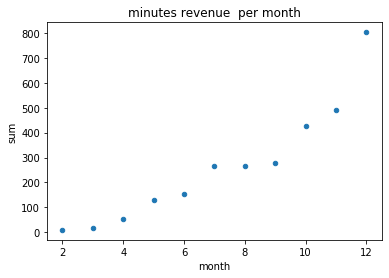

In [35]:
total_rev_min_per_month=new3.query('call_rev > 0').groupby(['month','plan'])['call_rev'].agg({'count','sum'}).reset_index()
print(total_rev_min_per_month)
total_rev_min_per_month.plot(x='month',y='sum',kind='scatter',title='minutes revenue  per month')
print(total_rev_min_per_month.describe())


we dropped **scatter plot** between the month and the total number of minutes revenue each month 

we can see that there is **no revenue** from ultimate plan just the surf plan just like the messages revenue

    * The maximum gain at december and the minimum at february 
    * july ,August,and September almost the same revenue and the it's continue increasing on october and november
**we can recognize from the chart that the revunue is increasing with the month**
* the average gain 263 usd
* the max gain 803 usd
* the min gain 9 usd
* 25% from gains around 90 usd
* 50% -- 265 usd
* 75% -- 351 usd
*the std 239

MegaBytes revenue

    month      plan        sum  count
0       2      surf    111.360      4
1       3      surf    541.890     11
2       3  ultimate     41.699      3
3       4      surf    917.730     17
4       4  ultimate     59.605      2
5       5      surf   1888.990     30
6       5  ultimate     15.316      1
7       6      surf   2435.320     50
8       6  ultimate     71.092      2
9       7      surf   4619.480     73
10      7  ultimate    111.797      2
11      8      surf   6499.350     92
12      8  ultimate    194.873      4
13      9      surf   6680.250    115
14      9  ultimate    159.621      5
15     10      surf   9702.210    147
16     10  ultimate    227.066      6
17     11      surf   9664.080    156
18     11  ultimate    208.257      5
19     12      surf  14316.670    216
20     12  ultimate    470.974     11


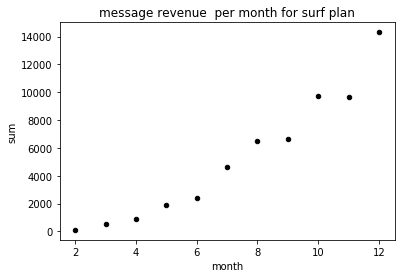

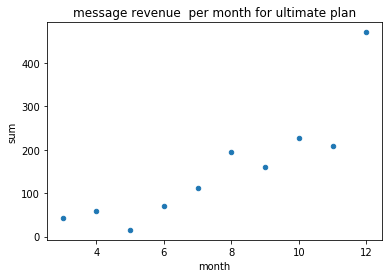

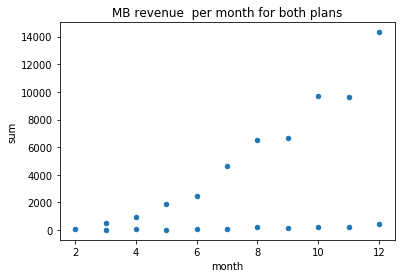

In [36]:
total_rev_mg_per_month=new3.query('mg_rev > 0').groupby(['month','plan'])['mg_rev'].agg({'count','sum'}).reset_index()
print(total_rev_mg_per_month)
total_rev_mg_per_month[total_rev_mg_per_month['plan']=='surf'].plot(x='month',y='sum',kind='scatter',color='black',title='message revenue  per month for surf plan')
total_rev_mg_per_month[total_rev_mg_per_month['plan']=='ultimate'].plot(x='month',y='sum',kind='scatter',title='message revenue  per month for ultimate plan')
total_rev_mg_per_month.plot(x='month',y='sum',kind='scatter',title='MB revenue  per month for both plans')
plt.show()
#print(total_rev_mg_per_month.describe())


we dropped **scatter plot** between the month and the total number of MB revenue  each month 

we can see that there is **revenue** from ultimate plan not just the surf plan unlike the messages and minutes revenue

the revenue from surf plan is much higher than the ultimate plan 
**Surf**
the revenue increases with the monththe max MB revenue 15K usd on December
the min MB revenue 111 usd on February
October and November almost the same revenue 9650 usd
August and September almost the same revenue 6600 usd

**Ultimate**
the revenue vast with the month
we start gaing revenue on march increased on April but on May it falls down to a low gain the it turned to increse on June July and August 
On september it decreases 
but the peak its on December we gain much more than all others months
the max MB revenue 470 usd on December
the min MB revenue 15 usd on May

In [37]:
#para=new3['call_rev','total_pay']
#limits=[]
#for row in :
q1 = new3['total_pay'].quantile(0.25)
q3 = new3['total_pay'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
   # limits.append([row,lo,uo])
#limits  
print('lower outlier',lo ,'upper outliers', uo)
filt=new3.query('(total_pay > -52.53) and (total_pay > 143.52)')
filt

lower outlier -52.52500000000002 upper outliers 143.51500000000001


,user_id,month,msg_each_month,minutes_each_month,calls_each_month,mb_volume per month,gb_volume per month,plan,city,msg_rev,call_rev,mg_rev,total_pay
13,1004,8,25.0,354.0,49.0,27982,28,surf,"Seattle-Tacoma-Bellevue, WA MSA",-25.00,-146.0,126.220,146.220
22,1007,9,47.0,399.0,63.0,28124,28,surf,"Grand Rapids-Kentwood, MI MSA",-3.00,-101.0,127.640,147.640
45,1017,10,35.0,400.0,68.0,28479,28,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",-15.00,-100.0,131.190,151.190
52,1019,12,128.0,467.0,59.0,28128,28,surf,"Jacksonville, FL MSA",2.34,-33.0,127.680,147.680
73,1028,10,73.0,39.0,6.0,46596,46,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",-927.00,-2961.0,111.132,181.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1418,9,0.0,241.0,35.0,33260,33,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",-50.00,-259.0,179.000,199.000
2208,1418,10,0.0,237.0,38.0,33918,34,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",-50.00,-263.0,185.580,205.580
2209,1418,11,0.0,233.0,37.0,36260,36,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",-50.00,-267.0,209.000,229.000
2210,1418,12,0.0,327.0,42.0,41925,41,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",-50.00,-173.0,265.650,285.650


# Conclusion

so lets see which revenue we have more for each plan 

**Messages**

- surf : on average 28 usd

the despersion of the data diverse from one point to another however the std is 31 we can conclude up that the data are far away from the mean 
- ultimate : no revenue

**Calls**
- surf : on average 263 usd

- ultimate : no revenue

**MB**
- surf : on average 6000 usd
- ultimate : on average 250 used


# Hypothesis

Revenue

null hypothesis : The average revenue from users of Ultimate equals the avg profit of Surf 

alternative hypothesis : The average revenue from users of Ultimate and Surf calling plans doesn't differ from the texting and session plan


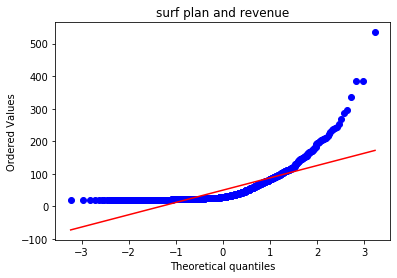

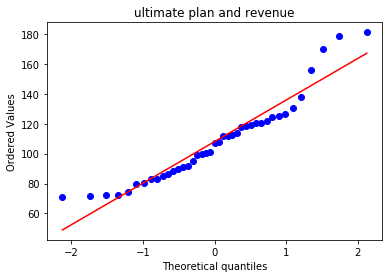

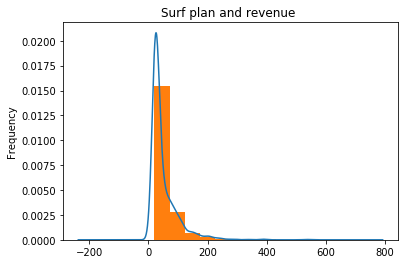

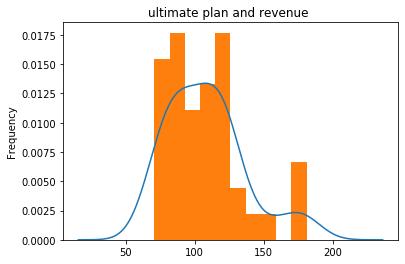

In [38]:
new3.head(3)
#q-q plot
#As you can see, most of the points, do not lie in a straight line. Showing that the underlying distribution is not normal
surf = new3[new3['plan']== 'surf'].query('total_pay > 20')
res = stats.probplot( surf['total_pay'], plot=plt)
plt.title('surf plan and revenue')
plt.show()
ultimate = new3[new3['plan']== 'ultimate'].query('total_pay > 70')
re = stats.probplot( ultimate['total_pay'], plot=plt)
plt.title('ultimate plan and revenue')
plt.show()
fig, ax = plt.subplots()
surf['total_pay'].plot.kde(ax=ax, legend=False, title='Surf plan and revenue ')
surf['total_pay'].plot.hist(density=True, ax=ax)
#ax.set_ylabel('Frequency')
fig, xl = plt.subplots()

ultimate['total_pay'].plot.kde(ax=xl, legend=False, title='ultimate plan and revenue ')
ultimate['total_pay'].plot.hist(density=True, ax=xl)
#xl.set_ylabel('Frequency')


for each plan i had draw a q-q plot and the distribution plot 
surf
I’d like you to look at surf plan and revenue (Q-Q) graph we can see that the values are far a way from the red line and that's tell us that we have non normal distribution however there's just little dots intercept with the line it tells us that we have right and left tail 
The points clearly follow another shape than the straight line.

The distribution is not bell-shaped but positively skewed .

Histograms of normal distributions show the highest frequency in the center of the distribution.
we need to see the revenue so we took the users who pay more than 20$ because 20 usd is the fee of subscribtion same with ultimate but the partnership fee 70 usd

ultimate

I’d like you to look at ultimate plan and revenue (Q-Q) graph we can see that the values are near the red line and that's prefers to normal distribution however we have more tail and outliers from the right 
The deviations from the straight line are minimal. This indicates normal distribution.

The distribution is not bell-shaped but positively skewed .

Histograms of normal distributions show the highest frequency in the center of the distribution.

In [39]:

alpha = 0.5
#y = new3[new3['plan']== 'ultimate']['total_pay'].mean()
#x = new3[new3['plan']== 'surf']['total_pay'].mean()

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(surf['total_pay'], ultimate['total_pay'])
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 


p-value:  5.808589901308907e-18
We reject the null hypothesis


Conclusion

using mann white u test on non normal distribution for surf and ultimate plan on the total revenue we had the probablity value equlas 5.8e-18 

City

null hypothesis : The average revenue from users in NY-NJ area is not different from that of the users from other regions.
alternative hypothesis : The average revenue from users in NY-NJ area different from that of the users from other regions.

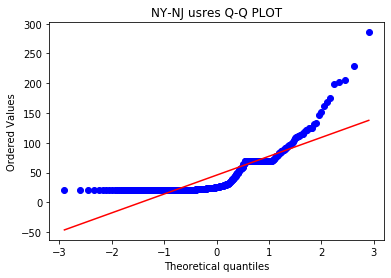

In [40]:
#new3[(new3['city']=='new york-newark-jersey city, ny-nj-pa msa')]

new3['city'] = new3['city'].str.lower()
s = new3[(new3['city']=='new york-newark-jersey city, ny-nj-pa msa')]
rese = stats.probplot( s['total_pay'], plot=plt)
plt.title('NY-NJ usres Q-Q PLOT')
plt.show()


#y['city'].unique()

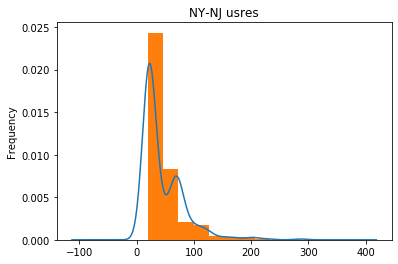

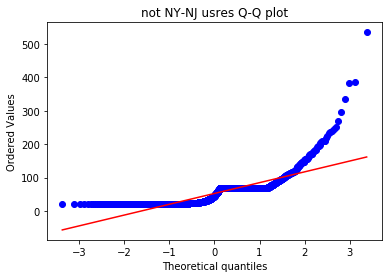

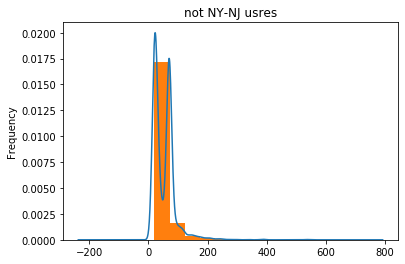

In [41]:
fig, ax = plt.subplots()
s['total_pay'].plot.kde(ax=ax, legend=False, title='NY-NJ usres')
s['total_pay'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frequency')
plt.show()

y = new3[(new3['city']!='new york-newark-jersey city, ny-nj-pa msa')]
re = stats.probplot( y['total_pay'], plot=plt)
plt.title('not NY-NJ usres Q-Q plot')
plt.show()
fig, ax = plt.subplots()
y['total_pay'].plot.kde(ax=ax, legend=False, title='not NY-NJ usres')
y['total_pay'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frequency')
plt.show()

In [42]:
alpha = 0.5

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(s['total_pay'],y['total_pay'])
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  1.6792999334658324e-06
We reject the null hypothesis


conclusion

for each plan i had draw a q-q plot and the distribution plot 

**ny-nj**

I’d like you to look at ny-nj (Q-Q) graph we can see that the values are near the red line and that's tell us that we have non normal distribution because we have two peaks inth bell graph however there's just little dots intercept with the line it tells us that we have right and left tail 
The points clearly follow another shape than the straight line.

The distribution is not bell-shaped but positively skewed .

Histograms of normal distributions show the highest frequency in the center of the distribution.
we need to see the revenue so we took the users who pay more than 20 because 20 is the fee of subscribtion same with ultimate but the partnership fee 70

**others**

I’d like you to look at others cities (Q-Q) graph we can see that the values are near the red line and that's prefers to normal distribution however we have more tail and outliers from the right 
The deviations from the straight line are minimal. This indicates normal distribution.

The distribution is not bell-shaped but positively skewed .

Histograms of normal distributions show the highest frequency in the center of the distribution.

# Conclusion

p-value approach to hypothesis testing uses the calculated probability to determine whether there is evidence to reject the null hypothesis. The null hypothesis, also known as the conjecture, is the initial claim about a population (or data generating process). The alternative hypothesis states whether the population parameter differs from the value of the population parameter stated in the conjecture.

the significance level is stated as 0.5 in advance to determine how small the p-value must be in order to reject the null hypothesis.
we had reject the null hypothesis in th both formulated hypothesis
The average revenue from users in NY-NJ area different from that of the users from other regions.


**How you formulated the null and alternative hypotheses?**


Since the null and alternative hypotheses are contradictory 
- H0: The null hypothesis: It is a statement about the population that either is believed to be true 
- Ha: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

***We reject the null hypothesis for both tests***


**plan test**
* null hypothesis : The average revenue from users of Ultimate equals the avg profit of Surf 

* alternative hypothesis : The average revenue from users of Ultimate and Surf calling plans doesn't differ from the texting and session plan

**city test**

* null hypothesis : The average revenue from users in NY-NJ area is not different from that of the users from other regions.
* alternative hypothesis : The average revenue from users in NY-NJ area different from that of the users from other regions.


**What criterion you used to test the hypotheses and why?**

I used **Mann-Whitney U test** because the total pay variable is continous and not normally distributed. Furthermore, use it to compare differences between two independent group

# conclusion

Analyze for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
our data had conclude a preliminary analysis of the plans based on a relatively small client selection about 500 Megaline clients 

the goal was to analyze clients' behavior and determine which prepaid plan brings in more revenue.
After preparing the data dealing with the missing values and filter the data from outliers 
we can see the total pay for each plan and how much revenue does the company gain from each plan and whixh plan is the most profitable for the company 

As we can see we 56% from the users we gain from them more than the ultimate 44% where as useres participate in surf plan 70% comparing to the ultimate plan 

That's makes sense when people see the cost of the two plan with a great difference in price between them ofcourse most of them are going to pick the cheaper regardless of what the plan offer so for example when we are dealing with cents per minutes most of people will not calculate it so they will think they are not going to loose money but when we gather all these users that the company benifit from them by making a revenue then it means a difference for the company it's like piggy bank if you put each day a dollar you will not feel that you are losing or saving money but after a year you will have 365 dollar however you see the impact after a year and the happiness will cover you 

however if you go down to the histogram chart you can see how many payments is the company gain in each month! as you can see at the end of the year for both plans the comapny gain more rather than the beginning of the year


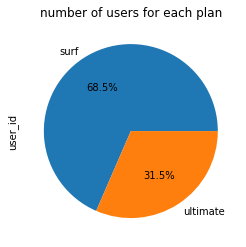

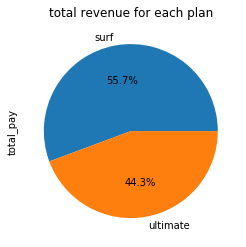

In [43]:
b=new3.groupby('plan')['user_id'].count()
c=new3.groupby('plan')['total_pay'].sum()

b.plot(kind='pie',title='number of users for each plan',autopct='%1.1f%%')
plt.show()
c.plot(kind='pie',title='total revenue for each plan',autopct='%1.1f%%')
plt.show()

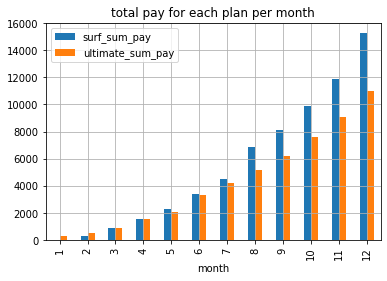

In [44]:
total_pay_per_month=new3.pivot_table(index =['month'],values=['total_pay'],columns=['plan'],aggfunc={'count','sum'}).reset_index()
total_pay_per_month.columns=['month','surf_count_pay','ultimate_count_pay','surf_sum_pay','ultimate_sum_pay']
total_pay_per_month.plot(y=['surf_sum_pay','ultimate_sum_pay'],grid=True,x='month',kind='bar',title='total pay for each plan per month')
plt.show()

In [45]:
#d for surf extra mg f for ultimate extra mg
#g for surf extra calls h for ultimate extra calls
#x for surf extra msg z for ultimate extra msgs
print('To sum up:')
print('the total of charge with and without the extra fees')

surf_clients_rev= new3[(new3['plan'] == 'surf')]['plan'].count() * plans['usd_monthly_pay'][0]
ulti_clients_rev = new3[(new3['plan'] == 'ultimate')]['plan'].count() * plans['usd_monthly_pay'][1]
print('number of surf clients revenue without extra charge$',surf_clients_rev)
print('number of ultimate clients revenue without extra charge$',ulti_clients_rev)

total_surf_clients_rev = surf_clients_rev + d + g + x
total_ulti_clients_rev = ulti_clients_rev + f + h + z
print('number of surf clients revenue with extra charge$',total_surf_clients_rev)
print('number of ultimate clients revenue with extra charge$',total_ulti_clients_rev)

print("how much extra fees does the company earn from each offer it gaves")
print('extra surf charge for sessions$',d)
print('extra surf charge for calls$',g)
print('extra surf charge for msgs$',x)
print('extra ultimate charge for sessions$',f)
print('extra ultimate charge for calls$',h)
print('extra ultimate charge for msgs$',z)

To sum up:
the total of charge with and without the extra fees
number of surf clients revenue without extra charge$ 31160
number of ultimate clients revenue without extra charge$ 50190
number of surf clients revenue with extra charge$ 91736.68000000001
number of ultimate clients revenue with extra charge$ 51750.3
how much extra fees does the company earn from each offer it gaves
extra surf charge for sessions$ 57377.33
extra surf charge for calls$ 2888.46
extra surf charge for msgs$ 310.89
extra ultimate charge for sessions$ 1560.3
extra ultimate charge for calls$ 0.0
extra ultimate charge for msgs$ 0.0
